In [2]:
# MODEL_ALPHA = 0.9

import os
import random
import numpy as np
import tensorflow as tf
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings
warnings.filterwarnings("ignore")

SEED = 42

def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)

def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)
    torch.manual_seed(SEED)
    random.seed(SEED)
    np.random.seed(SEED)

# Call the above function with seed value
set_global_determinism(seed=SEED)

from LoadSyntheticdata import Synthetic_Dataset
from torch.utils import data
from FID import compute_fid
from utils.viz import *

In [3]:
list_syn_data = load_synthetic_data()
l_syn, l_real, l_running_real, l_running_syn, l_walking_real, l_walking_syn, l_GoingDownS_real, l_GoingDownS_syn, colors = categorize_data(list_syn_data)

x_train shape is (6055, 3, 1, 150), x_test shape is (1524, 3, 1, 150)
y_train shape is (6055,), y_test shape is (1524,)
return three classes data and labels ['Walking', 'Running', 'GoingDownS']
train_data shape is (4034, 3, 1, 150)
train label shape is (4034, 3)


100%|██████████████████████████████████████| 4034/4034 [00:09<00:00, 412.10it/s]


syn_signals (4034, 3, 150)
signals_label (4034,)
real_signals (4034, 3, 150)


In [4]:
l_syn = reshape_and_normalize(l_syn)
l_real_p, l_syn_p = preprocess_data(l_real, l_syn)

fid_score = compute_fid(l_real_p, l_syn_p)
print("FID Score:", fid_score)

127/127 [==============================] - 7s 57ms/step
FID Score: 0.07339025706789881


In [5]:
# Add noise to synthetic data
target_noise_db = 10
noise_syn = add_noise_to_syn_data(l_syn, target_noise_db)
noise_syn_p = preprocess_noise_data(noise_syn)

# Compute FID with noisy synthetic data
fid_score_noise = compute_fid(l_real_p, noise_syn_p)
print("FID Score with Noise:", fid_score_noise)

127/127 [==============================] - 7s 57ms/step
FID Score with Noise: 133.28146413744562


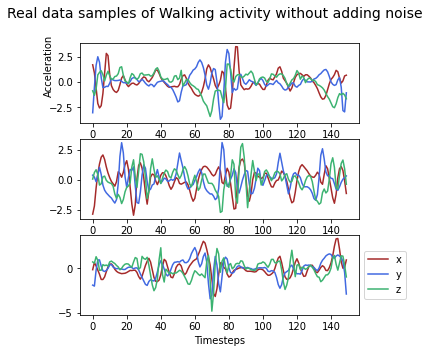

In [6]:
# Plot real data samples without noise
plot_real_data_samples(list_syn_data, 'Real_Walking.png')

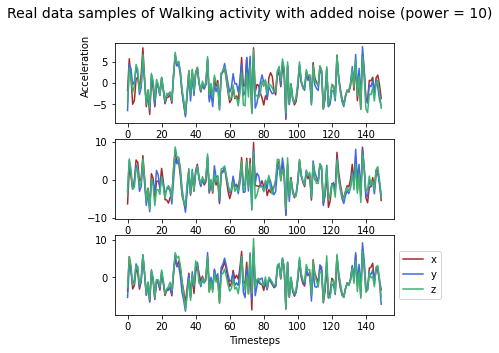

In [7]:
# Plot real data samples with added noise
plot_noise_data_samples(list_syn_data, target_noise_db, 'Real_Walking_Noise.png')